# **RESNET-50 FOR CT SCAN IMAGES**

In [ ]:
!unzip "/content/drive/MyDrive/CTfull" #unzipping dataset(mounted on Drive)

Streaming output truncated to the last 5000 lines.
  inflating: CTfull/train/normal/nCT5067.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT5067.jpg  
  inflating: CTfull/train/normal/nCT1229.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT1229.jpg  
  inflating: CTfull/train/normal/nCT5729.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT5729.jpg  
  inflating: CTfull/train/normal/nCT6234.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT6234.jpg  
  inflating: CTfull/train/normal/nCT7894.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT7894.jpg  
  inflating: CTfull/train/normal/nCT2734.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT2734.jpg  
  inflating: CTfull/train/normal/nCT6963.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT6963.jpg  
  inflating: CTfull/train/normal/nCT8782.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT8782.jpg  
  inflating: CTfull/train/normal/nCT2287.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT2287.jpg  
  in

In [ ]:
#importing libraries
import cv2
import pandas as pd
import os
import numpy as np
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
images=[]
labels=[]

In [ ]:
a="/content/CTfull/train/covid/" #path for covid positive images (train)

In [ ]:
#loading images & labels from the path
for item in os.listdir(a):
    c=str(a+item)
    img = cv2.imread(c) 
    

    width = 224
    height = 224
    dim = (width, height)
    try:
        resized = cv2.resize(img, dim , interpolation=cv2.INTER_AREA) #resizing the images
    except:
        break
        print("b")
    images.append(resized)
    labels.append("1") #1 for covid pos
    
for item in os.listdir("/content/CTfull/train/normal/"): #path for covid negative images (train)
    img = cv2.imread("/content/CTfull/train/normal/"+item) 
    width=224
    height=224
    dim=(width,height)
    try:
        res = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)
       
    except:
        print("b")
        break
    images.append(res)
    labels.append("0") #0 for covid neg
    

In [ ]:
images=np.asarray(images) #converting to numpy arrays

In [ ]:
labels=np.asarray(labels) #converting the labels to an array

In [ ]:
trainy=labels.astype("uint8") 

In [ ]:
#creating a dataframe by combining images and labels to make shuffling easier in the next step
df = pd.DataFrame(list(zip(images, labels)), 
               columns =['Image', 'Label'])

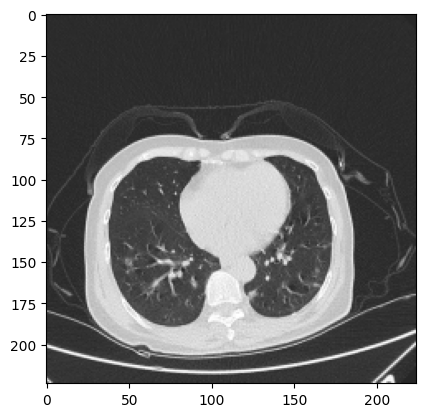

In [ ]:
plt.imshow(images[0]) #plotting an image from the training set

In [ ]:
#shuffling the df created above to disperse covid positive and negative across the training set
from sklearn.utils import shuffle 
df = shuffle(df)

In [ ]:
trainx=df["Image"] #converting the df back to two numpy arrays containing images and labels

In [ ]:
trainy=df["Label"]

In [ ]:
trainx=np.asarray(trainx)

In [ ]:
traindata=[]
for i in range (len(trainx)):
    trx=trainx[i]
    traindata.append(trx)

In [ ]:
traindata=np.asarray(traindata)

In [ ]:
traindata.shape

(3000, 224, 224, 3)

In [ ]:
trainy=np.asarray(trainy)

In [ ]:
trainy=trainy.astype("uint8")

In [ ]:
import keras

In [ ]:
#Using ResNet50 model (pre trained on ImageNet) with hyper parameter tuning
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
def create_model():
    base_model = keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    output_layer = layers.Dense(1, activation='sigmoid')(x)
    model = keras.models.Model(inputs=base_model.input, outputs=output_layer)
    return model

def create_and_compile_model(learning_rate, batch_size):
    model = create_model()
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
#paramters for tuning
learning_rate = [0.001, 0.01, 0.1] 
batch_size = [16, 32, 64]

model = KerasClassifier(build_fn=create_and_compile_model, verbose=0)
param_dist = dict(learning_rate=learning_rate,
                  batch_size=batch_size)
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=4, cv=3)
random_search.fit(traindata, trainy)

print('Best score:', random_search.best_score_)
print('Best parameters:', random_search.best_params_)


<ipython-input-26-87f841076b19>:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_and_compile_model, verbose=0)


94765736/94765736 [==============================] - 1s 0us/step


Best score: 0.5303333401679993
Best parameters: {'learning_rate': 0.01, 'batch_size': 16}


In [ ]:
def create_model(learning_rate, batch_size):
    base_model = keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    output_layer = layers.Dense(1, activation='sigmoid')(x)
    model = keras.models.Model(inputs=base_model.input, outputs=output_layer)

    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
#Using the best parameters to train thE model
best_learning_rate = 0.01
best_batch_size = 16
model = create_model(best_learning_rate, best_batch_size)
model.fit(traindata, trainy, epochs=39, batch_size=best_batch_size)

Epoch 1/39
188/188 [==============================] - 73s 182ms/step - loss: 17.2797 - accuracy: 0.7927
Epoch 2/39
188/188 [==============================] - 34s 181ms/step - loss: 2.0200 - accuracy: 0.8950
Epoch 3/39
188/188 [==============================] - 34s 179ms/step - loss: 0.3865 - accuracy: 0.9513
Epoch 4/39
188/188 [==============================] - 34s 182ms/step - loss: 0.1539 - accuracy: 0.9770
Epoch 5/39
188/188 [==============================] - 34s 182ms/step - loss: 0.1362 - accuracy: 0.9833
Epoch 6/39
188/188 [==============================] - 34s 180ms/step - loss: 0.0919 - accuracy: 0.9853
Epoch 7/39
188/188 [==============================] - 34s 181ms/step - loss: 0.0469 - accuracy: 0.9947
Epoch 8/39
188/188 [==============================] - 34s 180ms/step - loss: 0.0131 - accuracy: 0.9973
Epoch 9/39
188/188 [==============================] - 34s 180ms/step - loss: 0.0072 - accuracy: 0.9990
Epoch 10/39
188/188 [==============================] - 34s 180ms/step - 

In [ ]:
#performing the same process as described above on the test set.
images=[] 
labels=[]

In [ ]:
a="/content/CTfull/test/covid/" #path for covid positive test images
for item in os.listdir(a):
    c=str(a+item)
    img = cv2.imread(c) 
    

    width = 224
    height = 224
    dim = (width, height)
    try:
        resized = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)
    except:
        break
        print("b")
    images.append(resized)
    labels.append("1")

for item in os.listdir("/content/CTfull/test/normal/"): #path for covid negatuve test images
    img = cv2.imread("/content/CTfull/test/normal/"+item) 
    width=224
    height=224
    dim=(width,height)
    try:
        res = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)
       
    except:
        print("b")
        break
    images.append(res)
    labels.append("0")
images=np.asarray(images)
labels=np.asarray(labels)
testy=labels.astype("uint8")
dframe = pd.DataFrame(list(zip(images, labels)), 
               columns =['Image', 'Label'])
from sklearn.utils import shuffle
dframe = shuffle(dframe)
testx=dframe["Image"] 
testy=dframe["Label"]
testx=np.asarray(testx)
testdata=[]
for i in range(len(testx)):
  tsx=testx[i]
  testdata.append(tsx)
testdata=np.asarray(testdata)
testy=np.asarray(testy)
testy=testy.astype("uint8")

In [ ]:
#evaluating the model
score = model.evaluate(testdata, testy, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.007895070128142834
Test accuracy: 0.9980000257492065


In [ ]:
#generating predictions
predictions = model.predict(testdata)

32/32 [==============================] - 4s 96ms/step


In [ ]:
preds=[]
for i in range(len(predictions)):
  if(predictions[i]>=0.5):
    preds.append(int("1"))
  else:
    preds.append(int("0"))

In [ ]:
preds=np.array(preds)

In [ ]:
ctr=0
for i in range(len(preds)):
  if(preds[i]!=testy[i]):
    ctr=ctr+1
print(ctr)

2


In [ ]:
#performance metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [ ]:
precision = precision_score(testy, preds) #precision

In [ ]:
precision

0.998

In [ ]:
matrix = confusion_matrix(testy, preds)#confusion matrix

In [ ]:
print(matrix)

[[499   1]
 [  1 499]]


<Axes: >

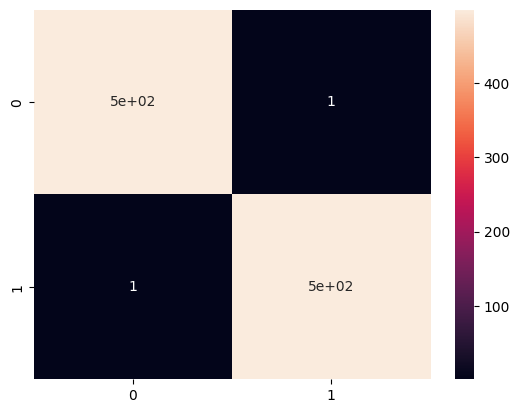

In [ ]:
import seaborn as sns
sns.heatmap(matrix, annot=True)

In [ ]:
kappa = cohen_kappa_score(testy, preds) #cohen kappa score
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.996000


In [ ]:
kappa = recall_score(testy, preds) #recall score
print('Recall: %f' % kappa)

Recall: 0.998000


In [ ]:
kappa = f1_score(testy, preds) #f1-score
print('F1 score: %f' % kappa)

F1 score: 0.998000
